In [1]:
import numpy as np
import pandas as pd
import os
import re
import torch
import torch.utils.data as Data
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torchstat import stat  # 查看网络参数
import matplotlib.pyplot as plt
import math
from time import time
import os  # 添加代码①
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"  # 添加代码②

In [2]:
data0 = np.load(r"C:\Users\song\Desktop\第一篇论文代码\experimental datasets\PRONOSTIA-bearing dataset\ts_1.npy")  

In [4]:
from matplotlib.font_manager import FontProperties
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=25) #解决中文label乱码问题
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False   #用来正常显示负号
font1 = {'family':'Times New Roman','weight':'normal','size':25}
font2 = {'family':'SimHei','weight':'normal','size':25}

In [5]:
data00 = np.load(r"C:\Users\song\Desktop\第一篇论文代码\experimental datasets\PRONOSTIA-bearing dataset\resized file\ts_3.npy")

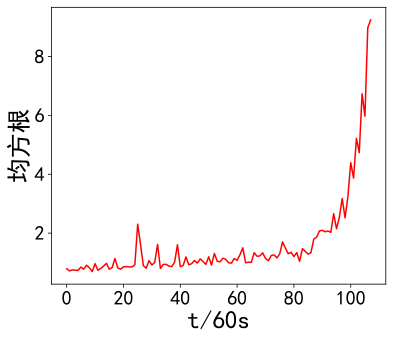

In [6]:
#plt.figure(figsize=(10,7), dpi=110)
plt.figure(figsize=(6,5))
plt.plot(data00[:,2],color = 'r')
#plt.title('Bearing1_6预测结果',font2)
plt.xlabel('t/60s',font2)
plt.ylabel('均方根',font2)
# 设置刻度字体大小
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.legend(fontsize = 15)
plt.savefig(r'C:\Users\song\Desktop\第一篇论文代码\Experimental results\CA-Transformer RUL prediction results save\phm2012_bearing1_3均方根_对齐后.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

In [7]:
data1 = np.load(r"C:\Users\song\Desktop\第一篇论文代码\experimental datasets\XJTU-SY-bearing dataset\condition1\ts_3.npy")

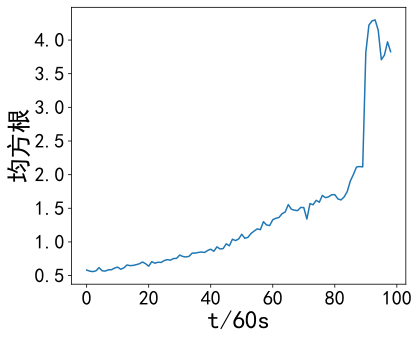

In [8]:
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=25) #解决中文label乱码问题
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False   #用来正常显示负号
font1 = {'family':'Times New Roman','weight':'normal','size':25}
font2 = {'family':'SimHei','weight':'normal','size':25}
#plt.figure(figsize=(10,7), dpi=110)
plt.figure(figsize=(6,5))
plt.plot(data1[:,2])
#plt.title('Bearing1_6预测结果',font2)
plt.xlabel('t/60s',font2)
plt.ylabel('均方根',font2)
# 设置刻度字体大小
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.legend(fontsize = 15)
plt.savefig(r'C:\Users\song\Desktop\第一篇论文代码\Experimental results\CA-Transformer RUL prediction results save\result-XJTU-condition1\bearing1_3均方根.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

In [9]:
data = np.load(r"C:\Users\song\Desktop\师兄第五章代码\experimental datasets\XJTU-SY-bearing dataset\condition1\TFRs_3.npy")

In [10]:
data.shape

(99, 80, 80)

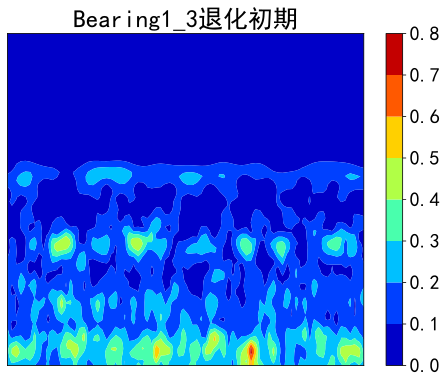

In [11]:
#  画CWT图像
fs = 800
t = np.arange(0, 80) / fs
plt.figure(figsize=(8,6))
plt.contourf(t, np.linspace(0, 12000, 80), abs(data[5].reshape(80,80)),cmap="jet")  # 画等高线图
plt.colorbar().ax.tick_params(labelsize=20)
plt.title("Bearing1_3退化初期", fontsize=25 )
plt.xticks([])
plt.yticks([])
plt.savefig(r'C:\Users\song\Desktop\第一篇论文代码\Experimental results\CA-Transformer RUL prediction results save\result-XJTU-condition1\Bearing1_3退化初期CWT_简版.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

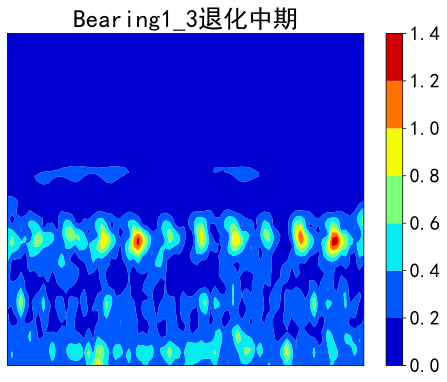

In [12]:
#  画CWT图像
fs = 800
t = np.arange(0, 80) / fs
plt.figure(figsize=(8,6))
plt.contourf(t, np.linspace(0, 12000, 80), abs(data[40].reshape(80,80)),cmap="jet")  # 画等高线图
plt.colorbar().ax.tick_params(labelsize=20)
plt.title("Bearing1_3退化中期", fontsize=25 )
plt.xticks([])
plt.yticks([])
plt.savefig(r'C:\Users\song\Desktop\第一篇论文代码\Experimental results\CA-Transformer RUL prediction results save\result-XJTU-condition1\Bearing1_3退化中期CWT_简版.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

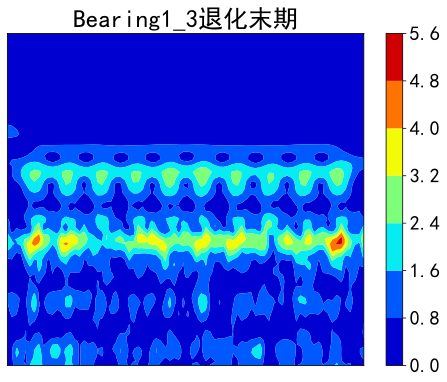

In [13]:
#  画CWT图像
fs = 800
t = np.arange(0, 80) / fs
plt.figure(figsize=(8,6))
plt.contourf(t, np.linspace(0, 12000, 80), abs(data[90].reshape(80,80)),cmap="jet")  # 画等高线图
plt.colorbar().ax.tick_params(labelsize=20)
plt.title("Bearing1_3退化末期", fontsize=25 )
plt.xticks([])
plt.yticks([])
plt.savefig(r'C:\Users\song\Desktop\第一篇论文代码\Experimental results\CA-Transformer RUL prediction results save\result-XJTU-condition1\Bearing1_3退化末期CWT_简版.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

In [14]:
def max_min_normalization(raw_features,whole_data):
#用于将特征数据进行最大-最小归一化。这是一种常见的数据预处理技术，目的是将所有特征缩放到-1到1的范围内，有助于模型训练。
    
    normalized_features=np.zeros_like(raw_features)
    for i in range(raw_features.shape[1]):
        max_value=np.max(whole_data[:,i])
        min_value=np.min(whole_data[:,i])
        numerator=2*(raw_features[:,i]-min_value)
        denominator=max_value-min_value
        normalized_features[:,i]=(numerator/denominator)-1
    return normalized_features

In [15]:
# 加载源域数据. Note that--root_dir=r'file_location'
def load_train_data(document_train_TFRs,document_train_TRs,whole_data):
    root_dir=r'C:\Users\song\Desktop\第一篇论文代码\experimental datasets\PRONOSTIA-bearing dataset\resized file'
    os.chdir(root_dir) #改变当前工作目录到指定的路径
    train_TFRs=np.load(document_train_TFRs,allow_pickle=True)
    train_TRs=np.load(document_train_TRs,allow_pickle=True)
    train_TRs=max_min_normalization(train_TRs,whole_data)#一维特征归一化
    train_label=np.arange(1,-1e-8,-1/(train_TRs.shape[0]-1),dtype=np.float32)#打标签
    train_label=np.reshape(train_label,[-1,1])
    return train_TFRs,train_TRs,train_label

In [16]:
# 加载目标域数据 used for formatting test data-4d tensor, and output its TFRs
def load_test_data(document_test_TFRs,document_test_TRs,whole_data):
    root_dir=r'C:\Users\song\Desktop\第一篇论文代码\experimental datasets\XJTU-SY-bearing dataset\condition1'
    os.chdir(root_dir)
    test_TFRs=np.load(document_test_TFRs,allow_pickle=True)
    test_TRs=np.load(document_test_TRs,allow_pickle=True)
    test_TRs=max_min_normalization(test_TRs,whole_data)
    return test_TFRs,test_TRs

In [17]:
# 生成源域训练集
# 选取 三个轴承的1D特征 和 三个轴承的2D特征
def Source_Train_Loader(document_train_TFRs_1,document_train_TFRs_2,document_train_TFRs_3,
                        document_train_TRs_1,document_train_TRs_2,document_train_TRs_3,
                        whole_data,BATCH_SIZE):
    train_TFRs_1,train_TRs_1,train_label_1=load_train_data(document_train_TFRs_1,document_train_TRs_1,whole_data)
    train_TFRs_2,train_TRs_2,train_label_2=load_train_data(document_train_TFRs_2,document_train_TRs_2,whole_data)
    train_TFRs_3,train_TRs_3,train_label_3=load_train_data(document_train_TFRs_3,document_train_TRs_3,whole_data)
    train_TFRs_total=np.concatenate((train_TFRs_1,train_TFRs_2,train_TFRs_3),axis=0)#合并三个轴承的2D特征
    train_TFRs_total=np.array(train_TFRs_total,dtype=np.float32)
    train_TRs_total=np.concatenate((train_TRs_1,train_TRs_2,train_TRs_3),axis=0)#合并三个轴承的1D特征
    train_TRs_total=np.array(train_TRs_total,dtype=np.float32)
    train_label_total=np.concatenate((train_label_1,train_label_2,train_label_3),axis=0)#合并三个轴承的标签
    train_label_total=np.array(train_label_total,dtype=np.float32)
    
# numpy转成tensor张量
    source_train_TFRs, source_train_TRs, source_train_labels=torch.from_numpy(train_TFRs_total),torch.from_numpy(train_TRs_total),torch.from_numpy(train_label_total)
    source_train_TFRs=torch.tensor(source_train_TFRs,dtype=torch.float32)
    # 扩充维度 （-1，80，80）-->（-1，1，80，80）
    source_train_TFRs=torch.reshape(source_train_TFRs,(source_train_TFRs.shape[0],1,source_train_TFRs.shape[1],source_train_TFRs.shape[2]))
    # 生成torch数据集
    torch_dataset=Data.TensorDataset(source_train_TFRs, source_train_TRs, source_train_labels)
    source_train_loader=Data.DataLoader(dataset=torch_dataset,batch_size=BATCH_SIZE,shuffle=True,drop_last=True)
    return source_train_loader

In [18]:
# 生成目标域训练集
# 选取 2个轴承的1D特征 和 2个轴承的2D特征
def Target_Train_Loader(document_name_TFRs_1,document_name_TFRs_2,
                        document_name_TRs_1,document_name_TRs_2,
                        whole_data,ratio,BATCH_SIZE):
    test_TFRs_1,test_TRs_1=load_test_data(document_name_TFRs_1,document_name_TRs_1,whole_data)
    test_TFRs_2,test_TRs_2=load_test_data(document_name_TFRs_2,document_name_TRs_2,whole_data)
    truncated_number_1=int(ratio*test_TRs_1.shape[0])# 在目标域中 只使用每个轴承的前30% 的1D和2D特征
    truncated_number_2=int(ratio*test_TRs_2.shape[0])
    # 截取前30%的特征
    trunc_TFRs_1,trunc_TRs_1=test_TFRs_1[:truncated_number_1],test_TRs_1[:truncated_number_1]
    trunc_TFRs_2,trunc_TRs_2=test_TFRs_2[:truncated_number_2],test_TRs_2[:truncated_number_2]
    # 合并2个轴承的1D和2D特征
    trunc_TFRs,trunc_TRs=np.concatenate((trunc_TFRs_1,trunc_TFRs_2),axis=0),np.concatenate((trunc_TRs_1,trunc_TRs_2),axis=0)

# numpy转成tensor张量    
    trunc_TFRs,trunc_TRs=torch.from_numpy(trunc_TFRs),torch.from_numpy(trunc_TRs)
    trunc_TFRs,trunc_TRs=trunc_TFRs.float(),trunc_TRs.float()
    trunc_TFRs=torch.tensor(trunc_TFRs,dtype=torch.float32)
    # 扩充维度 （-1，80，80）-->（-1，1，80，80）
    trunc_TFRs=torch.reshape(trunc_TFRs,(trunc_TFRs.shape[0],1,trunc_TFRs.shape[1],trunc_TFRs.shape[2]))
    # 生成torch数据集
    torch_dataset=Data.TensorDataset(trunc_TFRs, trunc_TRs)
    target_train_loader=Data.DataLoader(dataset=torch_dataset,batch_size=BATCH_SIZE,shuffle=True,drop_last=True)
    return target_train_loader

In [19]:
#  生成目标域测试集
def target_test_data(document_name_TFRs,document_name_TRs,whole_data,i):
    test_TFRs,test_TRs=load_test_data(document_name_TFRs,document_name_TRs,whole_data)
    RUL_actual_interval=[48,118,99,0,14]    # 目标域Condition1下五个轴承的全寿命
    test_actual_labels=np.arange(1,-1e-8,-1/(RUL_actual_interval[i-1]-1),dtype=np.float32)# 测试集打标签
    test_actual_labels=np.reshape(test_actual_labels,[-1,1])
    
# numpy转成tensor张量     
    test_TFRs, test_TRs, test_actual_labels=torch.from_numpy(test_TFRs),torch.from_numpy(test_TRs),torch.from_numpy(test_actual_labels)
    test_TFRs=torch.tensor(test_TFRs,dtype=torch.float32)
    # 扩充维度 （-1，80，80）-->（-1，1，80，80）
    test_TFRs=torch.reshape(test_TFRs,(test_TFRs.shape[0],1,test_TFRs.shape[1],test_TFRs.shape[2]))
    
    test_TFRs, test_TRs, test_actual_labels=test_TFRs.float(), test_TRs.float(), test_actual_labels.float()
    target_test_TFRs, target_test_TRs, target_test_actual_labels=Variable(test_TFRs),Variable(test_TRs),Variable(test_actual_labels)
    return target_test_TFRs, target_test_TRs, target_test_actual_labels

In [20]:
# 计算测试集的rmse 和 mae
def test_accuracy_cal(predictions,test_label):
    test_rmse=torch.sqrt(torch.mean(torch.square(predictions-test_label)))
    test_mae=torch.mean(torch.abs(predictions-test_label))
    return test_rmse,test_mae

In [21]:
#  域自适应模块   multiple-kernel MMD (MK-MMD)
def guassian_kernel(source, target, kernel_mul=2.0, kernel_num=5, fix_sigma=None):
    n_samples = int(source.size()[0])+int(target.size()[0])
    total = torch.cat([source, target], dim=0)
    total0 = total.unsqueeze(0).expand(int(total.size(0)), int(total.size(0)), int(total.size(1)))
    total1 = total.unsqueeze(1).expand(int(total.size(0)), int(total.size(0)), int(total.size(1)))
    L2_distance = ((total0-total1)**2).sum(2)
    if fix_sigma:
        bandwidth = fix_sigma
    else:
        bandwidth = torch.sum(L2_distance.data) / (n_samples**2-n_samples)
    bandwidth /= kernel_mul ** (kernel_num // 2)
    bandwidth_list = [bandwidth * (kernel_mul**i) for i in range(kernel_num)]
    kernel_val = [torch.exp(-L2_distance / bandwidth_temp) for bandwidth_temp in bandwidth_list]
    return sum(kernel_val)

def mmd_rbf_noaccelerate(source, target, kernel_mul=2.0, kernel_num=5, fix_sigma=None):
    batch_size = int(source.size()[0])
    kernels = guassian_kernel(source, target,
                              kernel_mul=kernel_mul, kernel_num=kernel_num, fix_sigma=fix_sigma)
    XX = kernels[:batch_size, :batch_size]
    YY = kernels[batch_size:, batch_size:]
    XY = kernels[:batch_size, batch_size:]
    YX = kernels[batch_size:, :batch_size]
    loss = torch.mean(XX + YY - XY -YX)
    return loss

In [22]:
ratio=0.6  # 目标域截取率
BATCH_SIZE=28
LR=1e-4
log_interval=40 #打印日志的间隔数
iteration=600
src_name='PHM-2012-PRONOSTIA'
tgt_name='XJTU-SY-experiment'

In [23]:
document_name_TFRs_1='TFRs_1.npy'
document_name_TFRs_2='TFRs_3.npy'
document_name_TFRs_3='TFRs_4.npy'
document_name_TRs_1='ts_1.npy'
document_name_TRs_2='ts_3.npy'
document_name_TRs_3='ts_4.npy'
root_dir=r'C:\Users\song\Desktop\第一篇论文代码\experimental datasets\PRONOSTIA-bearing dataset\resized file'
os.chdir(root_dir)
train_TRs_1=np.load(document_name_TRs_1)
train_TRs_2=np.load(document_name_TRs_2)
train_TRs_3=np.load(document_name_TRs_3)
# 三个轴承的数据集合
whole_data=np.concatenate((train_TRs_1,train_TRs_2,train_TRs_3),axis=0)
source_train_loader=Source_Train_Loader(document_name_TFRs_1,document_name_TFRs_2,document_name_TFRs_3,
                                        document_name_TRs_1,document_name_TRs_2,document_name_TRs_3,
                                        whole_data,BATCH_SIZE)

C:\TEMP\Temp\ipykernel_11076\2298002349.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  source_train_TFRs=torch.tensor(source_train_TFRs,dtype=torch.float32)


In [24]:
document_name_TFRs_1='TFRs_1.npy'
document_name_TFRs_2='TFRs_2.npy'
document_name_TRs_1='ts_1.npy'
document_name_TRs_2='ts_2.npy'
target_train_loader=Target_Train_Loader(document_name_TFRs_1,document_name_TFRs_2,
                                        document_name_TRs_1,document_name_TRs_2,
                                        whole_data,ratio,BATCH_SIZE)

C:\TEMP\Temp\ipykernel_11076\3311323982.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  trunc_TFRs=torch.tensor(trunc_TFRs,dtype=torch.float32)


In [25]:
# 加载测试数据并使其成为在线测试的变量
document_name_TFRs='TFRs_3.npy'
document_name_TRs='ts_3.npy'
# 4 表示使用第4个轴承作为测试轴承
target_test_TFRs, target_test_TRs, target_test_actual_labels=target_test_data(document_name_TFRs,document_name_TRs,whole_data,3)

C:\TEMP\Temp\ipykernel_11076\2076930972.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_TFRs=torch.tensor(test_TFRs,dtype=torch.float32)


In [26]:
target_test_TFRs.shape

torch.Size([99, 1, 80, 80])

In [27]:
# CBAM模块
#（1）通道注意力机制
class channel_attention(nn.Module):
    # 初始化, in_channel代表输入特征图的通道数, ratio代表第一个全连接的通道下降倍数
    def __init__(self, in_channel, ratio=8):
        # 继承父类初始化方法
        super(channel_attention, self).__init__()
        
        # 全局最大池化 [b,c,h,w]==>[b,c,1,1]
        self.max_pool = nn.AdaptiveMaxPool2d(output_size=1)
        # 全局平均池化 [b,c,h,w]==>[b,c,1,1]
        self.avg_pool = nn.AdaptiveAvgPool2d(output_size=1)
        
        # 第一个全连接层, 通道数下降ratio倍
        self.fc1 = nn.Linear(in_features=in_channel, out_features=in_channel//ratio, bias=False)
        # 第二个全连接层, 恢复通道数
        self.fc2 = nn.Linear(in_features=in_channel//ratio, out_features=in_channel, bias=False)
        
        # relu激活函数
        self.relu = nn.ReLU()
        # sigmoid激活函数
        self.sigmoid = nn.Sigmoid()
    
    # 前向传播
    def forward(self, inputs):
        # 获取输入特征图的shape
        b, c, h, w = inputs.shape
        
        # 输入图像做全局最大池化 [b,c,h,w]==>[b,c,1,1]
        max_pool = self.max_pool(inputs)
        # 输入图像的全局平均池化 [b,c,h,w]==>[b,c,1,1]
        avg_pool = self.avg_pool(inputs)
 
        # 调整池化结果的维度 [b,c,1,1]==>[b,c]
        max_pool = max_pool.view([b,c])
        avg_pool = avg_pool.view([b,c])
 
        # 第一个全连接层下降通道数 [b,c]==>[b,c//4]
        x_maxpool = self.fc1(max_pool)
        x_avgpool = self.fc1(avg_pool)
 
        # 激活函数
        x_maxpool = self.relu(x_maxpool)
        x_avgpool = self.relu(x_avgpool)
        
        # 第二个全连接层恢复通道数 [b,c//4]==>[b,c]
        x_maxpool = self.fc2(x_maxpool)
        x_avgpool = self.fc2(x_avgpool)
        
        # 将这两种池化结果相加 [b,c]==>[b,c]
        x = x_maxpool + x_avgpool
        # sigmoid函数权值归一化
        x = self.sigmoid(x)
        # 调整维度 [b,c]==>[b,c,1,1]
        x = x.view([b,c,1,1])
        # 输入特征图和通道权重相乘 [b,c,h,w]
        outputs = inputs * x
        
        return outputs

#（2）空间注意力机制
class spatial_attention(nn.Module):
    # 初始化，卷积核大小为7*7
    def __init__(self, kernel_size=3):
        # 继承父类初始化方法
        super(spatial_attention, self).__init__()
        
        # 为了保持卷积前后的特征图shape相同，卷积时需要padding
        padding = kernel_size // 2
        # 7*7卷积融合通道信息 [b,2,h,w]==>[b,1,h,w]
        self.conv = nn.Conv2d(in_channels=2, out_channels=1, kernel_size=kernel_size,
                              padding=padding, bias=False)
        # sigmoid函数
        self.sigmoid = nn.Sigmoid()
    
    # 前向传播
    def forward(self, inputs):
        
        # 在通道维度上最大池化 [b,1,h,w]  keepdim保留原有深度
        # 返回值是在某维度的最大值和对应的索引
        x_maxpool, _ = torch.max(inputs, dim=1, keepdim=True)
        
        # 在通道维度上平均池化 [b,1,h,w]
        x_avgpool = torch.mean(inputs, dim=1, keepdim=True)
        # 池化后的结果在通道维度上堆叠 [b,2,h,w]
        x = torch.cat([x_maxpool, x_avgpool], dim=1)
        
        # 卷积融合通道信息 [b,2,h,w]==>[b,1,h,w]
        x = self.conv(x)
        # 空间权重归一化
        x = self.sigmoid(x)
        # 输入特征图和空间权重相乘
        outputs = inputs * x
        
        return outputs

#（3）CBAM注意力机制
class cbam(nn.Module):
    # 初始化，in_channel和ratio=4代表通道注意力机制的输入通道数和第一个全连接下降的通道数
    # kernel_size代表空间注意力机制的卷积核大小
    def __init__(self, in_channel, ratio=8, kernel_size=3):
        # 继承父类初始化方法
        super(cbam, self).__init__()
        
        # 实例化通道注意力机制
        self.channel_attention = channel_attention(in_channel=in_channel, ratio=ratio)
        # 实例化空间注意力机制
        self.spatial_attention = spatial_attention(kernel_size=kernel_size)
    
    # 前向传播
    def forward(self, inputs):
        
        # 先将输入图像经过通道注意力机制
        x = self.channel_attention(inputs)
        # 然后经过空间注意力机制
        x = self.spatial_attention(x)
        
        return x
    

In [28]:
class Gating(nn.Module):
    def __init__(self, m, d_model, seq_len):  # m: 输入和输出的维度。d_model: 编码器模型的维度。seq_len: 序列的长度。
        super().__init__()
        self.m = m
        self.seq_len = seq_len
        # the reset gate r_i
        self.W_r = nn.Parameter(torch.Tensor(m, m))
        self.V_r = nn.Parameter(torch.Tensor(m, m))
        self.b_r = nn.Parameter(torch.Tensor(m))
       # W_r, V_r, b_r: 分别为重置门参数。重置门用于控制过去状态的多少信息需要保留。
        

        # the update gate u_i
        self.W_u = nn.Parameter(torch.Tensor(m, m))
        self.V_u = nn.Parameter(torch.Tensor(m, m))
        self.b_u = nn.Parameter(torch.Tensor(m))
         # W_u, V_u, b_u,更新门参数。更新门用于控制当前输入和过去状态的信息如何融合。
        
        
        
        
        # the output
        self.W_e = nn.Parameter(torch.Tensor(m, d_model))
        self.b_e = nn.Parameter(torch.Tensor(d_model))
       # W_e, b_e: 输出权重和偏置，用于生成最终的输出。
        
        
        

        self.init_weights()

        self.cnn_layers = nn.Sequential(
            nn.Conv1d(seq_len, seq_len, kernel_size=3, stride=1, padding=1),
        )

    def init_weights(self):
        #初始化所有权重参数，使用均匀分布，分布的范围基于 m 的倒数平方根计算，这有助于在训练初期保持激活值的尺度。
        stdv = 1.0 / math.sqrt(self.m)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)

    def forward(self, x):
        x = x
        x_i = x  # x_i: 当前处理的输入行（假设输入是多行数据的堆栈）
        h_i = self.cnn_layers(
            x)  # h_i: 应用卷积层后的特征表示。
        r_i = torch.sigmoid(torch.matmul(h_i, self.W_r) + torch.matmul(x_i, self.V_r) + self.b_r)
        #重置门的输出，计算方式是 h_i 和 x_i 的线性变换后通过 Sigmoid 激活函数。
        u_i = torch.sigmoid(torch.matmul(h_i, self.W_u) + torch.matmul(x_i, self.V_u) + self.b_u)
        #u_i: 更新门的输出，同样是通过线性变换和 Sigmoid 激活计算。
        # the output of the gating mechanism
        hh_i = torch.mul(h_i, u_i) + torch.mul(x_i, r_i)
        #hh_i: 最终的门控输出，结合了更新门和重置门的信息。

        return torch.matmul(hh_i,
                            self.W_e) + self.b_e  # 通过线性变换将 hh_i 转换为最终的输出维度 d_model。


class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.0, max_len=25):
        super(PositionalEncoding, self).__init__()

        pe = torch.zeros(max_len, d_model)  # (25,25)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)  # (25,1)

        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))  # (13,)

        pe[:, 0::2] = torch.sin(position * div_term)  # (25,13)
        temp = torch.cos(position * div_term)  # (25,13)
        pe[:, 1::2] = temp[:, :-1]  # 由于pe[:, 1::2]的维度是（25,12）, 所以需要将(25,13) => (25,12)

        pe = pe.unsqueeze(0).transpose(0, 1)  # transpose交换第0维和第1维的位置（1,25,25） ==> （25,1,25）

        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(1), :].squeeze(1)
        return x

In [29]:
class hybrid_CA_Transformer(nn.Module):
    # CA_Transformer 类，它是一个结合了注意力机制和Transformer结构的复杂神经网络。这个模型用于处理一维和二维特征，
    # 通过融合这些特征来预测剩余使用寿命（RUL）。

    def __init__(self):
        super(hybrid_CA_Transformer, self).__init__()
        ############################ CA Block ##############################
        self.feature_extractor_1_before = nn.Sequential(  # cbam前 2D特征提取通道
            # (in_channels,out_channels,kernel_size,stride,padding)
            nn.Conv2d(1, 12, 4, 2, padding=1),  # ? * 12 * 40 * 40
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Conv2d(12, 24, 4, 2, padding=1),  # ? * 24 * 20 * 20
            nn.ReLU(True),
            nn.BatchNorm2d(24),
        )
        self.AlexNet1 = nn.Sequential(
            nn.Conv2d(24, 48, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.cbam = cbam(in_channel=48)
        self.AlexNet2 = nn.Sequential(
            nn.Conv2d(48, 128, kernel_size=5, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=4, stride=2),
        )
        self.feature_extractor_1_after = nn.Sequential(  # cbam后  2D特征提取通道
            nn.Dropout(0.2),
            nn.Conv2d(128, 48, 3, 5, padding=1),  # ? * 48 * 4 * 4
            nn.ReLU(True),
            nn.BatchNorm2d(48),
            nn.Dropout(0.2),
            nn.Conv2d(48, 100, 3, 1, padding=1),  # ? * 100 * 1 * 1
            nn.ReLU(True),
        )
        ############################ Transformer Block ##############################
        # 1D特征提取通道
        self.gat=Gating(1,25,25)
        self.pos = PositionalEncoding(d_model=25, max_len=25)
        encoder_layers = nn.TransformerEncoderLayer(d_model=25,
                                                    nhead=5,
                                                    dim_feedforward=32,
                                                    dropout=0.2,
                                                    activation='relu')
        self.transformer = nn.TransformerEncoder(encoder_layers, num_layers=1)

        ######################## FINAL LINEAR Block #############################
        self.rul_fc_out = nn.Sequential(  # 输出RUL
            nn.Linear(725, 50),  # 100 + 625
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(50, 1),
            nn.Sigmoid(), 
        )

    def forward(self, x1, x2):
        # x1为2D特征
        features_1 = self.feature_extractor_1_before(x1)  # cbam前
        features_1 = self.AlexNet1(features_1)
        features_1 = self.cbam(features_1)  # cbam特征排序
        features_1 = self.AlexNet2(features_1)
        features_1 = self.feature_extractor_1_after(features_1)  # cbam后
        features_1 = features_1.mean([2, 3])

        # x2为1D特征
        x2 = x2.unsqueeze(2)  # (batch_size,25) ==> (batch_size,25,1)
        # print(x2.size())
        batch_size, d_model, lenth = x2.shape
       # print('song',x2.shape)
        x2=self.gat(x2)
        x2 = self.pos(x2)
        # print(x2.size())
        # x2 = x2.reshape(1, batch_size, -1) # 满足Transformer的输入格式(len, batch_size, d_model)
        x2 = x2.permute(2, 0, 1)
        # print(x2.size())
        features_2 = self.transformer(x2)
        features_2 = features_2.reshape(batch_size, -1)  # (25, batch_size, 25) ==> (batch_size,25*25)

        merge_features = torch.cat((features_1, features_2), dim=1)  # 特征融合
        RUL_out = self.rul_fc_out(merge_features)  # 得到RUL
        return RUL_out, merge_features

In [30]:
class hybrid_CA_Transformer_DAN(nn.Module):
    def __init__(self):
            super(hybrid_CA_Transformer_DAN, self).__init__()
            self.ca_transformer = hybrid_CA_Transformer()  # 得到双重网络
    def forward(self, source_train_x1, source_train_x2, target_train_x1, target_train_x2):
            MMD_loss = 0
            # if self.training == True:
            RUL_out_src, merge_features_src = self.ca_transformer(source_train_x1, source_train_x2)  # 得到源域预测的RUL和 融合的特征
            _, merge_features_tgt = self.ca_transformer(target_train_x1, target_train_x2)  # 得到目标域 融合的特征
            # 将源域特征和目标域特征 进行域自适应学习
            MMD_loss += mmd_rbf_noaccelerate(merge_features_src, merge_features_tgt)
            return RUL_out_src, MMD_loss



# class hybrid_CA_Transformer_DAN(nn.Module):
#     def __init__(self):
#         super(hybrid_CA_Transformer_DAN, self).__init__()
#         self.ca_transformer = hybrid_CA_Transformer()

#     def forward(self, source_train_x1, source_train_x2, target_train_x1=None, target_train_x2=None):
#         if self.training and (target_train_x1 is not None and target_train_x2 is not None):
#             MMD_loss = 0
#             RUL_out_src, merge_features_src = self.ca_transformer(source_train_x1, source_train_x2)
#             _, merge_features_tgt = self.ca_transformer(target_train_x1, target_train_x2)
#             MMD_loss += mmd_rbf_noaccelerate(merge_features_src, merge_features_tgt)
#             return RUL_out_src, MMD_loss
#         else:
#             # 在测试或可视化时，只返回模型的预测输出
            return self.ca_transformer(source_train_x1, source_train_x2)

In [31]:
def train(model):
    src_iter=iter(source_train_loader) # iter 生成迭代器。使用.next返回迭代器的下一个项目
    tgt_iter=iter(target_train_loader)
    loss_func=nn.MSELoss()
    min_val_rmse = 10000
    min_val_mae = 10000
    t1=time()
    for i in range(1,iteration+1):
        model.train()
        #LEARNING_RATE = LR / math.pow((1 + 10 * (i - 1) / (iteration)), 0.75)
        LEARNING_RATE = 1e-4
        optimizer=torch.optim.Adam(model.parameters(),lr=LEARNING_RATE)
        
        try:
            src_x1,src_x2,src_label=src_iter.next()
        except Exception as err:
            src_iter=iter(source_train_loader)
            src_x1,src_x2,src_label=src_iter.next()
            
        try:
            tgt_x1,tgt_x2=tgt_iter.next()
        except Exception as err:
            tgt_iter=iter(target_train_loader)
            tgt_x1,tgt_x2=tgt_iter.next()
            
#         # 添加模型计算图
#         writer.add_graph(model, (src_x1,src_x2,tgt_x1,tgt_x2))
        
        optimizer.zero_grad()
        src_pred , mmd_loss=model(src_x1,src_x2,tgt_x1,tgt_x2) #  此次迭代的模型前向传递
        rul_pred_loss=loss_func(src_pred,src_label)            # 计算训练迭代过程的MSE
        lambd=2 / (1 + math.exp(-10 * (i) / iteration)) - 1   #  一个平衡RUL预测误差和域分布差异误差项之间的权衡超参数。
        #lambd=1
        loss=rul_pred_loss + lambd * mmd_loss   # 回归误差 + 域分布差异 =  总体优化目标误差
        loss.backward()
        optimizer.step()
        
#         if i % (log_interval) == 0:   #每迭代40次，打印一次训练结果
#             print('Train iter: {} [({:.0f}%)]\nTotal loss: {}\nRUL_prediction_Loss: {}\nMMD_Loss: {}'.format(
#             i,100. * i / iteration, loss.item(), rul_pred_loss.item(), mmd_loss.item()))

#         #保存最佳模型
#         val_loss = save_best_valid(model).item()
#         root_dir=r'C:\Users\admin\Desktop\黄博士实验\Experimental results\CA-Transformer RUL prediction results save\result-XJTU-condition2\best-model'
#         os.chdir(root_dir)
#         if val_loss < min_val_loss:
#             min_val_loss = val_loss
#             #print("save best model")
#             torch.save(model.state_dict(),"best_model_bearing2_4.pth")

        #每迭代60次，打印一次测试结果
        if i % 60 == 0: 
            print('Total loss: {}\n'.format(loss.item()))
            test_RMSE,test_MAE,tgt_pred=valid(model)
            print('source domain: {} -to- target domain: {}\n RUL testing prediction performance-RMSE: {}\n RUL testing prediction performance-MAE: {}\n'.format(
            src_name,tgt_name,test_RMSE.item(),test_MAE.item()))
            root_dir=r'C:\Users\song\Desktop\第一篇论文代码\Experimental results\CA-Transformer RUL prediction results save\result-XJTU-condition1\best-model'
            os.chdir(root_dir)
            #保存最佳模型
            if test_RMSE.item() < min_val_rmse and test_MAE.item() < min_val_mae:
                min_val_rmse = test_RMSE.item()
                min_val_mae = test_MAE.item()
                print("save best model")
                torch.save(model.state_dict(),"model_bearing1_3.pth")
                #torch.save(model,"model_bearing1_3.pt")
    t2=time()
    t=t2-t1
    print('模型训练完毕！Running time is {} seconds'.format(t))
    
def save_best_valid(model):
    #model.eval()
    loss_func = nn.MSELoss()
    with torch.no_grad():
        tgt_pred , _ = model(target_test_TFRs, target_test_TRs,target_test_TFRs, target_test_TRs)
    val_loss = loss_func(tgt_pred,target_test_actual_labels)
    #_,val_loss=test_accuracy_cal(tgt_pred,target_test_actual_labels)
    return val_loss       

def valid(model):
    #model.eval()
    with torch.no_grad():
        tgt_pred , _= model(target_test_TFRs, target_test_TRs,target_test_TFRs, target_test_TRs)
    test_RMSE,test_MAE=test_accuracy_cal(tgt_pred,target_test_actual_labels)
    plt.plot(tgt_pred.data.numpy())
    plt.plot(target_test_actual_labels.data.numpy())
    plt.show()
    plt.ion()
    #可以从这里保存效果最佳的图片
    return test_RMSE,test_MAE,tgt_pred    

def apply_dropout(m):
    if type(m) == nn.Dropout:
        m.train()
        
def test(model):
    #model.eval()
    with torch.no_grad():
        model.apply(apply_dropout)  #开启MC dropout 估计模型的贝叶斯不确定性
        tgt_pred , _= model(target_test_TFRs, target_test_TRs,target_test_TFRs, target_test_TRs)
    test_RMSE,test_MAE=test_accuracy_cal(tgt_pred,target_test_actual_labels)
    return test_RMSE,test_MAE,tgt_pred

Total loss: 0.1375526487827301



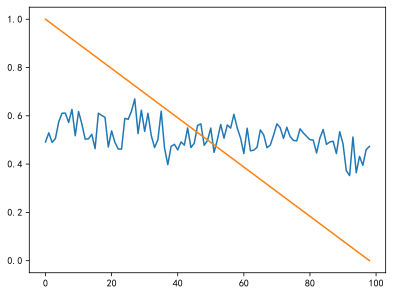

source domain: PHM-2012-PRONOSTIA -to- target domain: XJTU-SY-experiment
 RUL testing prediction performance-RMSE: 0.27038148045539856
 RUL testing prediction performance-MAE: 0.2360154092311859

save best model
Total loss: 0.13433215022087097



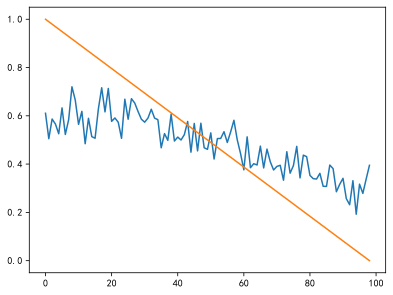

source domain: PHM-2012-PRONOSTIA -to- target domain: XJTU-SY-experiment
 RUL testing prediction performance-RMSE: 0.20214466750621796
 RUL testing prediction performance-MAE: 0.1674923598766327

save best model
Total loss: 0.14263519644737244



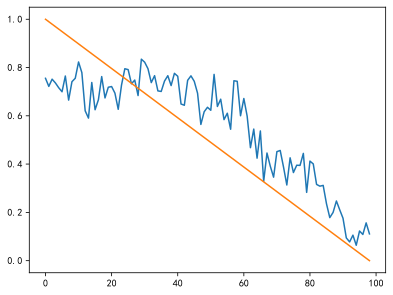

source domain: PHM-2012-PRONOSTIA -to- target domain: XJTU-SY-experiment
 RUL testing prediction performance-RMSE: 0.15896986424922943
 RUL testing prediction performance-MAE: 0.1398211419582367

save best model
Total loss: 0.15122108161449432



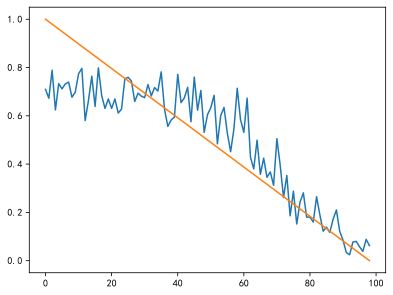

source domain: PHM-2012-PRONOSTIA -to- target domain: XJTU-SY-experiment
 RUL testing prediction performance-RMSE: 0.13348908722400665
 RUL testing prediction performance-MAE: 0.10154874622821808

save best model
Total loss: 0.14723674952983856



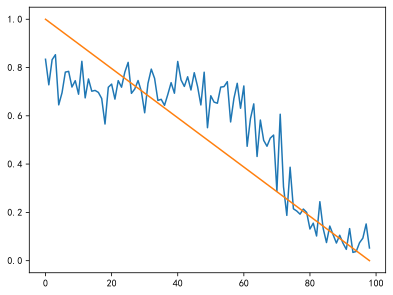

source domain: PHM-2012-PRONOSTIA -to- target domain: XJTU-SY-experiment
 RUL testing prediction performance-RMSE: 0.15420959889888763
 RUL testing prediction performance-MAE: 0.12296907603740692

Total loss: 0.12398364394903183



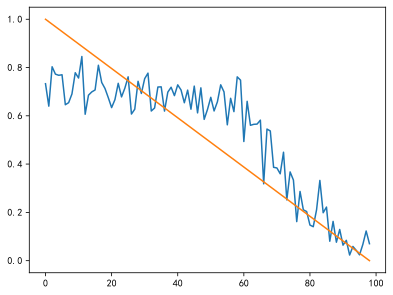

source domain: PHM-2012-PRONOSTIA -to- target domain: XJTU-SY-experiment
 RUL testing prediction performance-RMSE: 0.14933562278747559
 RUL testing prediction performance-MAE: 0.12073231488466263

Total loss: 0.13434313237667084



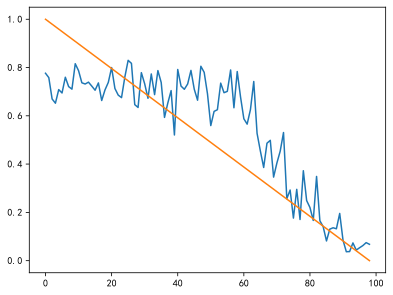

source domain: PHM-2012-PRONOSTIA -to- target domain: XJTU-SY-experiment
 RUL testing prediction performance-RMSE: 0.15934887528419495
 RUL testing prediction performance-MAE: 0.12833376228809357

Total loss: 0.13082735240459442



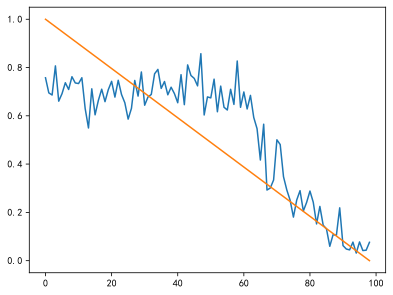

source domain: PHM-2012-PRONOSTIA -to- target domain: XJTU-SY-experiment
 RUL testing prediction performance-RMSE: 0.1643734872341156
 RUL testing prediction performance-MAE: 0.13141395151615143

Total loss: 0.1256292164325714



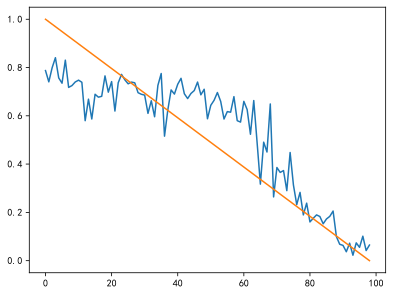

source domain: PHM-2012-PRONOSTIA -to- target domain: XJTU-SY-experiment
 RUL testing prediction performance-RMSE: 0.14050619304180145
 RUL testing prediction performance-MAE: 0.11265017837285995

Total loss: 0.12191304564476013



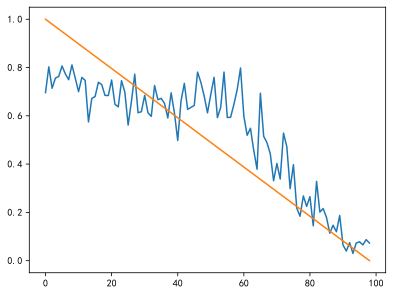

source domain: PHM-2012-PRONOSTIA -to- target domain: XJTU-SY-experiment
 RUL testing prediction performance-RMSE: 0.1491900533437729
 RUL testing prediction performance-MAE: 0.12103012949228287

模型训练完毕！Running time is 40.24886178970337 seconds


In [32]:
from torch.utils.tensorboard import SummaryWriter


model=hybrid_CA_Transformer_DAN()

# # 初始化SummaryWriter
# writer = SummaryWriter(log_dir='C:/Users/song/Desktop/TRY/runs2')  # 你可以指定不同的log_dir路径

# # 记录超参数到TensorBoard
# writer.add_hparams({'learning_rate': learning_rate, 'batch_size': batch_size, 'num_epochs': num_epochs}, {})
# # ratio=0.6  # 目标域截取率
# # BATCH_SIZE=64
# # LR=1e-4
# # log_interval=40 #打印日志的间隔数
# # iteration=600

train(model)

# writer.close()

In [33]:
#加载最优模型
root_dir=r'C:\Users\song\Desktop\第一篇论文代码\Experimental results\CA-Transformer RUL prediction results save\result-XJTU-condition1\best-model'
os.chdir(root_dir)
model.load_state_dict(torch.load('model_bearing1_3.pth'))
#model = torch.load('model_bearing1_3.pt')

<All keys matched successfully>

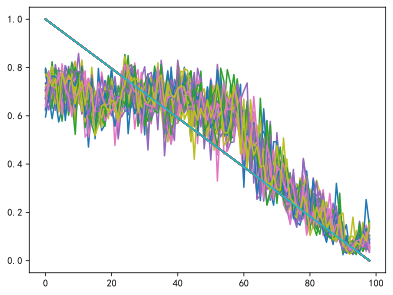

Running time is: 3.0362675189971924


In [34]:
Num_testing=30  #测试30次求置信区间
tgt_pred=[[] for i in range(Num_testing)]
t1=time()
for i in range(Num_testing):
    _,_,tgt_pred[i]=test(model)
    plt.figure(1)
    plt.plot(tgt_pred[i].detach().numpy())
    plt.plot(target_test_actual_labels)
    plt.ion()
plt.show()
print('Running time is:',time()-t1)

In [35]:
tgt_RMSE,tgt_MAE,tgt_pred1=test(model)
tgt_RMSE,tgt_MAE

(tensor(0.1445), tensor(0.1104))

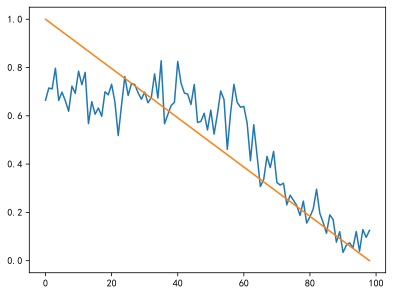

In [36]:
plt.plot(tgt_pred1.detach().numpy())
plt.plot(target_test_actual_labels)

In [37]:
from scipy.stats import norm
confidence_level = 0.95
alpha = 1 - confidence_level
z = norm.ppf(1 - alpha/2)
print(z)

1.959963984540054


In [38]:
np_preds = []
for i in range(Num_testing):
    np_preds.append(tgt_pred[i].detach().numpy()) 
np_preds = np.hstack(np_preds)
preds_mean = np_preds.mean(axis=1)
preds_std = np_preds.std(axis=1)

In [39]:
root_dir=r'C:\Users\song\Desktop\第一篇论文代码\Experimental results\CA-Transformer RUL prediction results save\result-XJTU-condition1\prediction-result'
os.chdir(root_dir)
np.savetxt('prediction-std-bearing1_3.txt',preds_std)

In [40]:
Proposed_method_prediction=np.savetxt('prediction-mean-bearing1_3.txt',preds_mean)
print('Results saved')

Results saved


In [41]:
#加载最优预测结果
root_dir=r'C:\Users\song\Desktop\第一篇论文代码\Experimental results\CA-Transformer RUL prediction results save\result-XJTU-condition1\prediction-result'
os.chdir(root_dir)
preds_mean = np.loadtxt("prediction-mean-bearing1_3.txt")
preds_std = np.loadtxt("prediction-std-bearing1_3.txt")

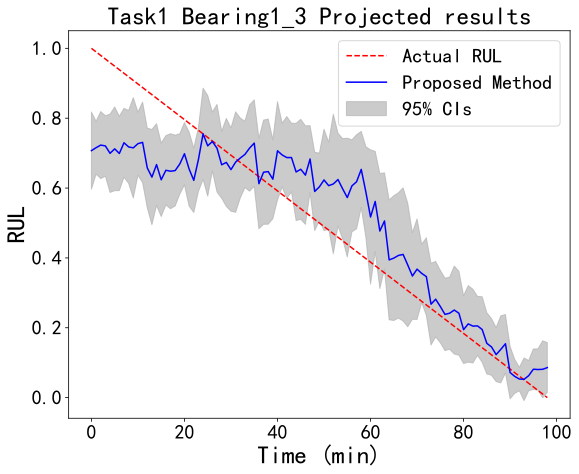

In [42]:
#plt.figure(figsize=(10,7), dpi=110)
plt.figure(figsize=(9,7))
plt.plot(target_test_actual_labels, color = 'r',linestyle="--", label='Actual RUL')
plt.plot(preds_mean, label='Proposed Method', color='b')
#plt.fill_between(range(len(preds_mean)), lowwer, upper, alpha=0.9,color='g', label='95% CIs')
plt.fill_between(range(len(preds_mean)), preds_mean - 1.96*preds_std, preds_mean + 1.96*preds_std, color='darkgrey',alpha=0.6, label='95% CIs')
#plt.fill_between(range(len(preds_mean)), preds_mean - 1*preds_std, preds_mean + 1*preds_std, alpha=0.3, label='90% CIs')
plt.title('Task1 Bearing1_3 Projected results',font2)
plt.xlabel('Time (min)',font2)
plt.ylabel('RUL',font2)
# 设置刻度字体大小
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 20)
plt.savefig('任务1下Bearing1_3.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

In [43]:
Proposed_method_prediction=np.savetxt('prediction-mean-bearing1_3.txt',preds_mean)
print('Results saved')

Results saved


In [44]:
def best_accuracy_cal(predictions,test_label):
    test_rmse=np.sqrt(np.mean(np.square(predictions-test_label)))
    test_mae=np.mean(np.abs(predictions-test_label))
    return test_rmse,test_mae

In [45]:
best_RMSE,best_MAE = best_accuracy_cal(preds_mean.reshape(-1,1),target_test_actual_labels.detach().numpy())
best_RMSE,best_MAE

(0.12786920911126756, 0.10190963112946713)

In [46]:
root_dir=r'C:\Users\song\Desktop\第一篇论文代码\Experimental results\CA-Transformer RUL prediction results save\result-XJTU-condition1\消融实验'
os.chdir(root_dir)
res1 = np.loadtxt('prediction-mean-bearing1_3.txt')
res2 = np.loadtxt('prediction-mean-bearing1_3_未用AlexNet.txt')
res3 = np.loadtxt('prediction-mean-bearing1_3_未用门控单元.txt')

<Figure size 1100x770 with 0 Axes>

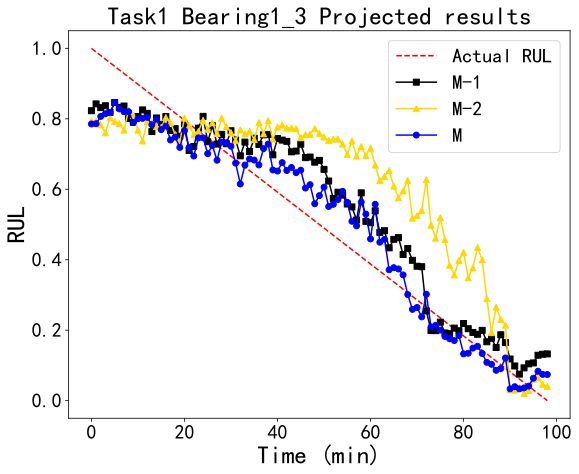

In [47]:
plt.figure(figsize=(10,7), dpi=110)
plt.figure(figsize=(9,7))
plt.plot(target_test_actual_labels, color = 'r',linestyle="--", label='Actual RUL')
plt.plot(res2, label='M-1', color='black',marker = 's')
plt.plot(res3, label='M-2', color='gold',marker = '^')
plt.plot(res1, label='M', color='b',marker = 'o')
plt.title('Task1 Bearing1_3 Projected results',font2)
plt.xlabel('Time (min)',font2)
plt.ylabel('RUL',font2)
# 设置刻度字体大小
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 20)
plt.savefig('任务1下Bearing1_3.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

In [48]:
root_dir=r'C:\Users\song\Desktop\第一篇论文代码\Experimental results\CA-Transformer RUL prediction results save\result-XJTU-condition3\prediction-result'
os.chdir(root_dir)
mean = np.loadtxt('prediction-mean-bearing3_5.txt')
std = np.loadtxt('prediction-std-bearing3_5.txt')

In [49]:
len(mean)

105

In [50]:
label=np.arange(1,-1e-8,-1/(len(mean)-1),dtype=np.float32)#打标签

In [51]:
lowwer = mean - 1.96*std
upper = mean + 1.96*std